In [1]:
# ----- LIBS

# geoprocessamento
import folium
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry import box
from shapely.geometry import mapping

# normalizar
import numpy as np
from shapely.geometry import mapping
from sklearn.preprocessing import MinMaxScaler

# plots
import matplotlib.pyplot as plt

# gerar e visualizar csv
import csv
import pandas as pd

# Extração de shapes e Plots da Unicamp

- Extração de região geográfica de interesse (bbbike) no formato .shp
- Plot de shapes

In [2]:
# Apontando para o path do dataset do Mapa de Edificações 
# - https://unicamp-arcgis.maps.arcgis.com/apps/View/index.html?appid=1d96ada62af4451bb4972b9779d09e66

import os

current_path = os.getcwd()
# print(current_path)
# print(current_path.find('lorawan-metricas-exp'))
# print(current_path[0:current_path.find('lorawan-metricas-exp')])

map_dataset_path = current_path[0:current_path.find('lorawan-experiments')]
building_shp_path = "datasets/unicamp-arcgis-dataset/edificacoes.shp"

unicamp_building_dataset_path = map_dataset_path + building_shp_path

In [3]:
# ----- READ BUILDING SHAPES DATASET

unicamp_df = gpd.read_file(unicamp_building_dataset_path)
# unicamp_roads_df = gpd.read_file(unicamp_roads_dataset_path)

print('SHAPE:', unicamp_df.shape)
unicamp_df.head(2)

SHAPE: (1170, 8)


,Id,PREDIO,NOME_DO_PR,UNIDADE,GlobalID,Shape_Leng,Shape_Area,geometry
0,444.0,8.0,CASA NO BREAK,"INSTITUTO DE FÍSICA""GLEB WATAGHIN"" (IFGW)",{A3AA0550-2317-433F-888F-BBA6148200AF},49.024480,135.943591,"POLYGON Z ((287762.773 7475309.137 0.000, 2877..."
1,65.0,11.0,DEPÓSITO DE MATERIAIS - DEM,HOSPITAL DE CLÍNICAS (HC),{418DC5B5-3050-40D4-BC58-E4BDFA11D4F3},56.199993,190.900186,"POLYGON Z ((288123.323 7474311.958 0.000, 2881..."


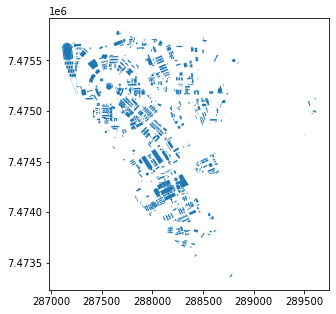

In [4]:
# ----- Plot UNICAMP MAPA Edificações
ax = unicamp_df.plot(figsize=(12, 5))

In [5]:
# Add coluna com centroids

unicamp_df['centroids'] = unicamp_df.centroid
# unicamp_df['centroids']
unicamp_df.head(2)

,Id,PREDIO,NOME_DO_PR,UNIDADE,GlobalID,Shape_Leng,Shape_Area,geometry,centroids
0,444.0,8.0,CASA NO BREAK,"INSTITUTO DE FÍSICA""GLEB WATAGHIN"" (IFGW)",{A3AA0550-2317-433F-888F-BBA6148200AF},49.024480,135.943591,"POLYGON Z ((287762.773 7475309.137 0.000, 2877...",POINT (287754.847 7475304.757)
1,65.0,11.0,DEPÓSITO DE MATERIAIS - DEM,HOSPITAL DE CLÍNICAS (HC),{418DC5B5-3050-40D4-BC58-E4BDFA11D4F3},56.199993,190.900186,"POLYGON Z ((288123.323 7474311.958 0.000, 2881...",POINT (288127.015 7474321.129)


In [6]:
# predio = unicamp_df[unicamp_df['UNIDADE'].str.contains("INOVA",  na=False)]
# print("SHAPE:", predio.shape)
# predio.head()

# Normalização de Mapa da Unicamp

In [7]:
# Bounds of Unicamp Map
unicamp_minx, unicamp_miny, unicamp_maxx, unicamp_maxy = unicamp_df.geometry.total_bounds

print('bounds:', unicamp_minx, unicamp_miny, unicamp_maxx, unicamp_maxy)
print('x:', unicamp_maxx-unicamp_minx)
print('y:', unicamp_maxy- unicamp_miny)

bounds: 287109.0126 7473356.5109 289617.4537000004 7475795.9585
x: 2508.441100000404
y: 2439.4475999996066


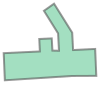

In [8]:
# get all geometries of unicamp_utm_df
unicamp_geometries = [i for i in unicamp_df.geometry]

# geometry example
unicamp_geometries[2]

In [9]:
map_minx = 1e+10
map_maxx = -1
map_miny = 1e+10
map_maxy = -1

for geometry in range(len(unicamp_geometries)):
    
    # get all coordinates (x,y) of polygons in unicamp_utm_df
    all_coords_per_geometry = mapping(unicamp_geometries[geometry])["coordinates"] 

    # split all coordinates per geometry and get x coords and y coords
    x_coords = [all_coords_per_geometry[0][i][0] for i in range(len(all_coords_per_geometry[0]))]
    y_coords = [all_coords_per_geometry[0][i][1] for i in range(len(all_coords_per_geometry[0]))]
    
    # convert to 2D array
    x_coords = np.array(x_coords)
    y_coords = np.array(y_coords)
    
    # get all geometry coords in x and y
    if geometry == 0:
        all_coords_x = x_coords.copy()
        all_coords_y = y_coords.copy()
    else:
        all_coords_x = np.append (all_coords_x, x_coords.copy(), axis=0)
        all_coords_y = np.append (all_coords_y, y_coords.copy(), axis=0)
        
    # get bounds limits of map and compare with unicamp_utm_df.geometry.total_bounds
    # after for loop, limits must be equal
    if np.min(x_coords) < map_minx:
        map_minx = np.min(x_coords)
    if np.max(x_coords) > map_maxx:
        map_maxx = np.max(x_coords)
    
    if np.min(y_coords) < map_miny:
        map_miny = np.min(y_coords)
    if np.max(y_coords) > map_maxy:
        map_maxy = np.max(y_coords)
    

# after for loop, limits must be equal
print(map_minx, map_miny,map_maxx, map_maxy)
print(unicamp_minx, unicamp_miny, unicamp_maxx, unicamp_maxy)
# yey

# convert to 2D array 
x = np.array(all_coords_x).reshape(-1, 1) # reshape -> 2D array
y = np.array(all_coords_y).reshape(-1, 1)

287109.0126 7473356.5109 289617.4537000004 7475795.9585
287109.0126 7473356.5109 289617.4537000004 7475795.9585


In [10]:
# create a normalized map with unicamp bounds

# criando novo mapa, que conterá geometrias normalizadas
mapa_normalizado = gpd.GeoDataFrame(columns=["id","building_number","building_name","unit", "geometry"])
mapa_normalizado['id'] = unicamp_df['Id']
mapa_normalizado['building_number'] = unicamp_df['PREDIO']
mapa_normalizado['building_name'] = unicamp_df['NOME_DO_PR']
mapa_normalizado['unit'] = unicamp_df['UNIDADE']

# processo de normalização
for geometry in range(len(unicamp_geometries)):

    # get all coordinates (x,y) of polygons in unicamp_utm_df
    all_coords_per_geometry = mapping(unicamp_geometries[geometry])["coordinates"] 
    
    # split all coordinates per geometry and get x coords and y coords
    x_coords = [all_coords_per_geometry[0][i][0] for i in range(len(all_coords_per_geometry[0]))]
    y_coords = [all_coords_per_geometry[0][i][1] for i in range(len(all_coords_per_geometry[0]))]
    
    # convert to 2D array
    x_coords = np.array(x_coords).reshape(-1, 1) 
    y_coords = np.array(y_coords).reshape(-1, 1)
    
    # define limits of normalization
    scaler_x = MinMaxScaler(feature_range = (0, unicamp_maxx - unicamp_minx))
    scaler_y = MinMaxScaler(feature_range = (0, unicamp_maxy - unicamp_miny))
    
    # normalize with all all geometry coords x 
    scaler_x.fit(x)
    transform_x = scaler_x.transform(x_coords)
    
    # normalize with all all geometry coords y
    scaler_y.fit(y)
    transform_y = scaler_y.transform(y_coords)
    
    # convert np array x and y normalized back to polygon
    building_geometry = np.append (transform_x, transform_y, axis=1)
    new_polygon = Polygon(building_geometry)
    
    mapa_normalizado.loc[geometry, 'geometry'] = new_polygon
    

print('Shape do Mapa normalizado:', mapa_normalizado.shape)
mapa_normalizado.head(3)

Shape do Mapa normalizado: (1170, 5)


,id,building_number,building_name,unit,geometry
0,444.0,8.0,CASA NO BREAK,"INSTITUTO DE FÍSICA""GLEB WATAGHIN"" (IFGW)","POLYGON ((653.760 1952.626, 653.921 1944.120, ..."
1,65.0,11.0,DEPÓSITO DE MATERIAIS - DEM,HOSPITAL DE CLÍNICAS (HC),"POLYGON ((1014.311 955.448, 1010.857 962.105, ..."
2,1282.0,4.0,SALAS DE AULA,"FAC.ENGa.CIVIL,ARQ. E URBANISMO","POLYGON ((1278.073 1971.314, 1278.638 1957.955..."


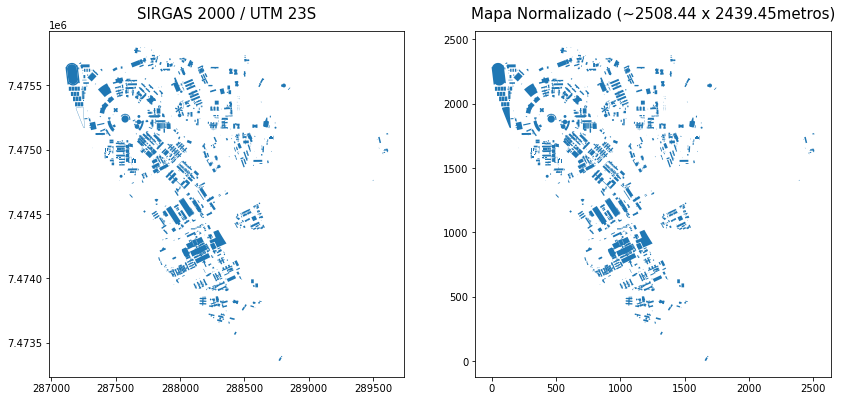

In [11]:
# ANTES E DEPOIS DA NORMALIZAÇÃO

fig, axes = plt.subplots(1,2, figsize = (14, 7)) # 1 linha, 2 colunas

# Mapa da unicamp no crs SIRGAS 2000/ UTM 23S
axes[0].set_title('SIRGAS 2000 / UTM 23S', fontsize=15, y=1.02)
unicamp_df.plot(ax=axes[0])

# Mapa da Unicamp
# onde:
# - unicamp bounds = 285960.71918678837 7473387.272237044 290348.567447891 7476048.738107968
# - maxx - minx    = 4387.848261102627
# - maxy - miny    = 2661.465870924294
title = 'Mapa Normalizado (~' + str(round(unicamp_maxx-unicamp_minx,2)) + ' x ' + str(round(unicamp_maxy-unicamp_miny,2)) + "metros)" 
axes[1].set_title(title,fontsize=15, y=1.02)
mapa_normalizado.plot(ax=axes[1])

plt.show()

In [12]:
mapa_normalizado.head(3)

,id,building_number,building_name,unit,geometry
0,444.0,8.0,CASA NO BREAK,"INSTITUTO DE FÍSICA""GLEB WATAGHIN"" (IFGW)","POLYGON ((653.760 1952.626, 653.921 1944.120, ..."
1,65.0,11.0,DEPÓSITO DE MATERIAIS - DEM,HOSPITAL DE CLÍNICAS (HC),"POLYGON ((1014.311 955.448, 1010.857 962.105, ..."
2,1282.0,4.0,SALAS DE AULA,"FAC.ENGa.CIVIL,ARQ. E URBANISMO","POLYGON ((1278.073 1971.314, 1278.638 1957.955..."


In [13]:
# ----- FUNÇÕES ÚTEIS P/ MANIPULAÇÃO DE SHAPES

def get_polygon_coords (polygon):
    g = [i for i in polygon.geometry]
    x,y = g[0].exterior.coords.xy
    coords = np.dstack((x,y)).tolist()
    
    return coords

def create_box_building(building_name, bounds, offset_xmin, offset_ymin, offset_xmax, offset_ymax):
    new_building = box(
        bounds[0] - offset_xmin,
        bounds[1] - offset_ymin,
        bounds[2] -offset_xmax,
        bounds[3] -offset_ymax
    )

    print("Bounds do prédio " + str(building_name) + ":", bounds)
    print("\nÁrea:", new_building.area)
    print("Length:", new_building.length)
    
    return new_building


def compare_buildings(ref_building, new_building):
    geodataset_ref = gpd.GeoSeries(ref_building)
    ax = geodataset_ref.plot(color='Gray')

    geodataset_new = gpd.GeoSeries(new_building)
    geodataset_new.plot(ax=ax) 

    
def calculate_distance(ref_polygon, new_polygon):
    points_df = gpd.GeoDataFrame(columns=["geometry"])
    points_df.loc[:, 'geometry'] = ref_polygon
    points_df.loc[0, 'geometry'] = new_polygon

    points_df['centroid'] = points_df["geometry"].centroid

    # Cálculo de Distância entre Circle centroids e cada linha do dataset
    print("Distancia entre centroids:\n", points_df.distance(new_polygon.centroid))

    return points_df


def add_dataset_rows(geodataset, ref_id, name, geometry):
    last_index = geodataset.shape[0]
    geodataset.loc[last_index, 'id'] = ref_id
    geodataset.loc[last_index, 'building_number'] = ref_id
    geodataset.loc[last_index, 'building_name'] = name
    geodataset.loc[last_index, 'unit'] = '{aaa}'
    geodataset.loc[last_index, 'geometry'] = geometry
    
    print("Novo Shape:", geodataset.shape)
    
    return geodataset.iloc[geodataset.shape[0]-1:geodataset.shape[0]]


def add_node_dataset_rows(geodataset, ref_osm_id, name, point):
    last_index = geodataset.shape[0]
    print(last_index)
    geodataset.loc[last_index, 'id'] = ref_osm_id
    geodataset.loc[last_index, 'number'] = ref_osm_id
    geodataset.loc[last_index, 'name'] = name
    geodataset.loc[last_index, 'x'] = point.x
    geodataset.loc[last_index, 'y'] = point.y
    geodataset.loc[last_index, 'z'] = 1.5
    
    print("Novo Shape:", geodataset.shape)
    
    return geodataset.iloc[geodataset.shape[0]-1:geodataset.shape[0]]

## Buscar e Mapear predios

In [14]:
# ----- RESULTADOS DO MAPEAMENTO (prédios com coletores) # id da tabela, id do dataset, num_predio

# ENCONTRADOS POR CONSULTA DE NOME:
# 1. Agência de Inovação Inova Unicamp (INOVA)  # 701, 1321.0 , 1.0 
# 2. Biblioteca Central (BC)   # 765, 535.0, 5.0
# 3. Centro de Biologia Molecular e Engenharia Genética (CBMEG)   # 688, 802.0, 9.0
# 4. Centro de Componentes Semicondutores (CCS)   # 175.0, 1.0 ~
# 5. Centro de Computação (CCUEC)   # 600, 845.0, 8.0
# 6. Centro de Diagnóstico de Doenças do Aparelho Digestivo (GASTROCENTRO) # 315, 1037.0, 6.0
# 7. Centro de Estudos de Petróleo (CEPETRO) # 539, 1115.0, 6.0
# 8. Centro de Hematologia e Hemoterapia (HEMOCENTRO) # 852, 1038.0, 7.0
# 9. Centro para Manutenção de Equipamentos (CEMEQ) # 219, 960.0, 15.0 
# 10. Ciclo Básico I   #  760, 671.0, 11.0 
# 11. Ciclo Básico II  #  753, 663.0, 3.0
# 12. Coordenadoria de Desenvolvimento Cultural (CDC) # 787, 533.0, 3.0
# 13. Diretoria Geral da Administração (DGA) # 193, 29.0, 1.0
# 14. Diretoria Geral de Recursos Humanos (DGRH) # 209, 9.0, 5.0
# 15. Divisão de Educação Infantil e Complementar (DEdIC) # 863, 1211.0, 1.0
# 16. Engenharia Básica (EB)  # 175.0, 1.0 ~
# 17. Escola Estadual de Ensino Fundamental Físico Sérgio Pereira Porto (SERGIO PORTO) # 297, 1220.0, 10.0
# 18. Faculdade de Ciências Médicas (FCM) # 867, 1238.0, 1.0 
# 19. Faculdade de Educação Física (FEF)  # 790, 727.0, 30.0
# 20. Faculdade de Enfermagem (FEnf)      # 880, 1240.0, 3.0
# 21. Faculdade de Engenharia Agrícola (FEAGRI)   # 674, 881.0, 1.0
# 22. Faculdade de Engenharia Civil, Arquitetura e Urbanismo (FEC)  # 2, 1282.0, 4.0
# 23. Faculdade de Engenharia de Alimentos (FEA)   # 253, 300.0, 2.0
# 24. Faculdade de Engenharia Elétrica e de Computação (FEEC) # 234, 278.0, 2.0
# 25. Faculdade de Engenharia Mecânica (FEM)   # 286, 1151.0, 6.0
# 26. Faculdade de Engenharia Química (FEQ)    # 396, 971.0, 28.0
# 27. Fundação de Desenvolvimento da Unicamp (FUNCAMP) # --------
# 28. Gabinete do Reitor (GR)      # 39, 1.0, 1.0
# 29. Grupo Gestor de Obras (GGO)  # 212, 195.0, 8.0
# 30. Hospital de Clínicas (HC)    # 115, 59.0, 6.0
# 31. Instituto de Artes (IA)      # 24, 513.0, 2.0
# 32. Instituto de Biologia (IB)   # 441, 604.0, 5.0
# 33. Instituto de Computação (IC) # 571, 776.0, 2.0
# 34. Instituto de Estudos da Linguagem (IEL) # 525, 488.0, 5.0
# 35. Instituto de Filosofia e Ciências Humanas (IFCH) # 540, 1112.0, 3.0
# 36. Instituto de Física Gleb Wataghin (IFGW) # 399, 441.0, 5.0
# 37. Instituto de Geociências (IG) da Rua Oswaldo Cruz (inferior) 183, 182.0, 8
# 38. Instituto de Geociências (IG) da Avenida Érico Veríssimo (superior) 1066, 1134.0, 1.1
# 39. Instituto de Matemática, Estatística e Computação Científica (IMECC) # 513, 459.0, 1.0
# 40. Instituto de Química (IQ) # 341, 376.0, 16.0
# 41. Prefeitura Universitária # 203, 4.0, 2.0
# 45. Restaurante Administrativo (RA) # 37, 198.0, 10.0
# 46. Restaurante Saturnino (RS) # 636, 1309.0, 1.0
# 47. Restaurante Universitário (RU) # 775, 531.0, 1.0

# NÃO ESTÃO NO MAPA:
# 27. Fundação de Desenvolvimento da Unicamp (FUNCAMP) # --------

# Casos especiais:
# 42. Ponto de ônibus – Rua Roxo Moreira (PO-RM)
# 43. Ponto de ônibus – Avenida Adolpho Lutz (PO-AL)
# 44. Ponto de ônibus – Rua Vital Brasil (PO-VB)

In [15]:
# ----- MÉTODOS DE BUSCA PARA MAPEAMENTO

# Busca por linha em todo dataset
# predio = mapa_normalizado.iloc[775:776] #ex Comvest 536-537
# # print(mapa_normalizado.shape)
# predio.head(predio.shape[0])

# Busca por Nome
predio = mapa_normalizado[mapa_normalizado['building_name'].str.contains("MUSEU",  na=False)]
# predio = mapa_normalizado[mapa_normalizado['unit'].str.contains("Museu",  na=False)]
print("SHAPE:", predio.shape)
predio.head(22)

SHAPE: (3, 5)


,id,building_number,building_name,unit,geometry
462,612.0,13.0,MUSEU CELULAR,INSTITUTO DE BIOLOGIA (IB),"POLYGON ((459.839 1550.036, 459.865 1539.583, ..."
702,1366.0,1.0,PRAÇA DO TEMPO E ESPAÇO - MUSEU EXPLORATÓRIO D...,REITORIA,"POLYGON ((1712.752 2141.429, 1712.738 2140.899..."
703,1367.0,2.0,ADMINISTRAÇÃO - MUSEU EXPLORATÓRIO DE CIÊNCIAS,REITORIA,"POLYGON ((1747.673 2123.183, 1732.081 2106.236..."


In [16]:
# predio.plot(color="red")

<AxesSubplot:>

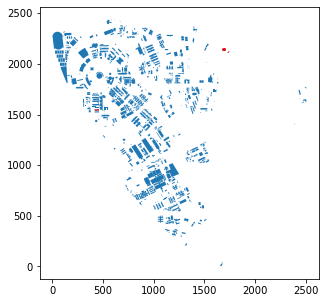

In [17]:
### ----- PLOT DE PREDIO DE ACORDO COM A BUSCA REALIZADA

ax = mapa_normalizado.plot(figsize=(12, 5))

# predios None
predio['geometry'].plot(ax=ax, color='Red')

# Para ampliar area mudar param. de set_xlim e set_ylim
# minx, miny, maxx, maxy = mapa_normalizado.total_bounds
# ax.set_xlim(minx -100, maxx)
# ax.set_ylim(miny -100, maxy)

In [18]:
mapa_normalizado[mapa_normalizado.shape[0]-5:mapa_normalizado.shape[0]]

,id,building_number,building_name,unit,geometry
1165,1445.0,4.0,Academia de Ginástica ao Ar Livre,None,"POLYGON ((701.642 1223.634, 714.261 1224.555, ..."
1166,0.0,0.0,None,None,"POLYGON ((536.049 1540.335, 536.049 1567.085, ..."
1167,0.0,0.0,None,None,"POLYGON ((570.032 1482.662, 564.833 1482.547, ..."
1168,0.0,4.0,Inova P&D,INOVA,"POLYGON ((1498.018 2134.044, 1498.209 2134.395..."
1169,0.0,0.0,Instituto de Otorrinolaringologia,None,"POLYGON ((1186.929 1019.863, 1202.243 992.924,..."


## Reposicionando posicionamento do CCS e EB 

In [19]:
# Tratamento para que prédio do CCS e EB não tenham o mesmo centroid 
# 175.0, 1.0 ~
point_IG = mapa_normalizado.query('id ==' + str(175.0))
# point_IG
print(point_IG['geometry'].centroid)

189    POINT (939.805 1193.583)
dtype: geometry


(1000.0, 1300.0)

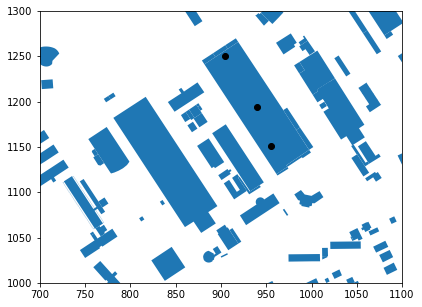

In [20]:
# Reposicionando posicionamento do CCS e EB (para que não tenham o mesmo centroid)
pt_CCS = Point (955.805, 1150.583)
pt_EB  = Point (905, 1250.583)

# Plot de paradas de ÔNIBUS
df = gpd.GeoDataFrame(columns=["geometry"],  crs='EPSG:31983')
df.loc[0, 'geometry'] = pt_CCS
df.loc[1, 'geometry'] = Point (939.805, 1193.583) # centroid do predio em comum
df.loc[2, 'geometry'] = pt_EB

ax = mapa_normalizado['geometry'].plot(figsize=(12, 5))
df.plot(ax=ax, color="black")

# para ampliar area mudar param. de set_xlim e set_ylim
minx, miny, maxx, maxy = mapa_normalizado.total_bounds
ax.set_xlim(700, 1100)
ax.set_ylim(1000, 1300)

# Cria e ADD Pontos não encontrados

### FUNCAMP

In [21]:
# Prédio de Referência: COMVEST
ref_id = 536 # index da linha do prédio COMVEST
ref_polygon = mapa_normalizado.iloc[ref_id:ref_id + 1] # ex Comvest 536-537
# get_polygon_coords(ref_polygon)

Bounds do prédio FUNCAMP: [671.4345000004396, 2364.147699999623, 694.7207000004128, 2379.911700000055]

Área: 260.70115679071546
Length: 67.89959999918938


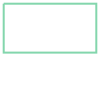

In [22]:
bounds_ref = list(ref_polygon.geometry.total_bounds)
building_funcamp = create_box_building("FUNCAMP", bounds_ref, -110, -107, -64.5, -79.5)
building_funcamp.boundary

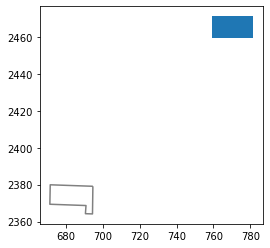

In [23]:
compare_buildings(ref_polygon['geometry'].boundary, building_funcamp )

In [24]:
# CALCULA DISTANCIA ENTRE CENTROIDS
calculate_distance(ref_polygon['geometry'], building_funcamp)
# ref_polygon

Distancia entre centroids:
 536    114.639238
0        0.000000
dtype: float64


,geometry,centroid
536,"POLYGON ((694.721 2379.107, 694.665 2375.106, ...",POINT (683.698 2373.744)
0,"POLYGON ((759.221 2471.148, 759.221 2459.412, ...",POINT (770.328 2465.280)


In [25]:
# add_dataset_rows(geodataset, ref_id, name, geometry):
add_dataset_rows(mapa_normalizado, -1000,'FUNCAMP',  building_funcamp)

Novo Shape: (1171, 5)


,id,building_number,building_name,unit,geometry
1170,-1000.0,-1000.0,FUNCAMP,{aaa},"POLYGON ((759.221 2471.148, 759.221 2459.412, ..."


In [26]:
mapa_normalizado[mapa_normalizado.shape[0]-5:mapa_normalizado.shape[0]]

,id,building_number,building_name,unit,geometry
1166,0.0,0.0,None,None,"POLYGON ((536.049 1540.335, 536.049 1567.085, ..."
1167,0.0,0.0,None,None,"POLYGON ((570.032 1482.662, 564.833 1482.547, ..."
1168,0.0,4.0,Inova P&D,INOVA,"POLYGON ((1498.018 2134.044, 1498.209 2134.395..."
1169,0.0,0.0,Instituto de Otorrinolaringologia,None,"POLYGON ((1186.929 1019.863, 1202.243 992.924,..."
1170,-1000.0,-1000.0,FUNCAMP,{aaa},"POLYGON ((759.221 2471.148, 759.221 2459.412, ..."


### Paradas de Ônibus

In [27]:
# Coordenadas obtidas pelo notebook "Mapa dinâmico"
# Google Maps ajuda nessa parte tb

parada_RM = Point(-47.0677, -22.8242) 
parada_AL = Point(-47.0629, -22.8319) 
parada_VB = Point(-47.0628, -22.8275)

# Convertendo Coordenadas em Degree para metros (31983)
pontos_onibus_df = gpd.GeoDataFrame(columns=["geometry"],  crs='EPSG:4326')
pontos_onibus_df.loc[0, 'geometry'] = parada_RM
pontos_onibus_df.loc[1, 'geometry'] = parada_AL
pontos_onibus_df.loc[2, 'geometry'] = parada_VB
pontos_onibus_df = pontos_onibus_df.to_crs('EPSG:31983')
# pontos_onibus_df.crs
pontos_onibus_df

,geometry
0,POINT (287793.104 7474455.271)
1,POINT (288297.792 7473609.406)
2,POINT (288301.248 7474096.840)


In [28]:
# PONTOS no CRS EPSG:31983
parada_RM = Point(pontos_onibus_df['geometry'][0])
parada_AL = Point(pontos_onibus_df['geometry'][1])
parada_VB = Point(pontos_onibus_df['geometry'][2])

print(parada_RM)
print(parada_AL)
print(parada_VB)

POINT (287793.10412685934 7474455.270733602)
POINT (288297.79246397456 7473609.405694909)
POINT (288301.24809904105 7474096.839670669)


In [29]:
# NORMALIZAÇÃO DE PONTOS 
points = [parada_RM, parada_AL, parada_VB]
norm_points = []

# convert to 2D array 
x = np.array(all_coords_x).reshape(-1, 1) # reshape -> 2D array
y = np.array(all_coords_y).reshape(-1, 1)

for coords in points:
    # convert to 2D array
    x_coords = np.array([coords.x]).reshape(-1, 1)
    y_coords = np.array([coords.y]).reshape(-1, 1)

    # define limits of normalization
    scaler_x = MinMaxScaler(feature_range = (0, unicamp_maxx - unicamp_minx))
    scaler_y = MinMaxScaler(feature_range = (0, unicamp_maxy - unicamp_miny))

    # normalize with all all geometry coords x 
    scaler_x.fit(x)
    transform_x = scaler_x.transform(x_coords)

    # normalize with all all geometry coords y
    scaler_y.fit(y)
    transform_y = scaler_y.transform(y_coords)

    print(transform_x, transform_y)
    norm_points.append(Point(transform_x, transform_y))

print(norm_points[0])

[[684.09152686]] [[1098.7598336]]
[[1188.77986397]] [[252.89479491]]
[[1192.23549904]] [[740.32877067]]
POINT (684.0915268593235 1098.7598336022347)


In [30]:
# p/ Plotar paradas de ÔNIBUS
pontos_onibus_norm_df = gpd.GeoDataFrame(columns=["geometry"],  crs='EPSG:31983')
pontos_onibus_norm_df.loc[0, 'geometry'] = norm_points[0]
pontos_onibus_norm_df.loc[1, 'geometry'] = norm_points[1]
pontos_onibus_norm_df.loc[2, 'geometry'] = norm_points[2]

pontos_onibus_norm_df

,geometry
0,POINT (684.092 1098.760)
1,POINT (1188.780 252.895)
2,POINT (1192.235 740.329)


<AxesSubplot:>

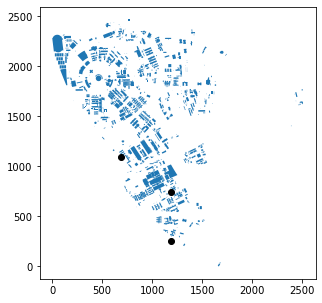

In [31]:
# Plot de paradas de ÔNIBUS
ax = mapa_normalizado['geometry'].plot(figsize=(12, 5))
pontos_onibus_norm_df.plot(ax=ax, color="black")

In [32]:
a =  mapa_normalizado.iloc[mapa_normalizado.shape[0]-3: mapa_normalizado.shape[0]]
a

,id,building_number,building_name,unit,geometry
1168,0.0,4.0,Inova P&D,INOVA,"POLYGON ((1498.018 2134.044, 1498.209 2134.395..."
1169,0.0,0.0,Instituto de Otorrinolaringologia,None,"POLYGON ((1186.929 1019.863, 1202.243 992.924,..."
1170,-1000.0,-1000.0,FUNCAMP,{aaa},"POLYGON ((759.221 2471.148, 759.221 2459.412, ..."


In [33]:
mapa_normalizado['centroid'] = mapa_normalizado.centroid

In [34]:
# get centroid museu
a =  mapa_normalizado.iloc[702: 703]
a

,id,building_number,building_name,unit,geometry,centroid
702,1366.0,1.0,PRAÇA DO TEMPO E ESPAÇO - MUSEU EXPLORATÓRIO D...,REITORIA,"POLYGON ((1712.752 2141.429, 1712.738 2140.899...",POINT (1694.975 2141.471)


# Artigo SIOT

In [141]:
import os 
current_path = os.getcwd()
current_path =  '~/mestrado/ns3-bmap/NS3/lorawan-experiments/'

# charts
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines

# ----- DATASET
import pandas as pd

# SET NUMBER OF SIMULATION REPEAT
NUM_SIM_REPEAT = 1 #10

# SET simulation_folder path and simulation_id
simulation_folder = current_path + "/smart-campus-applications/simulations"
# simulation_id = "/04/" # cenario I - dataset baterias | até SF 10
#simulation_id = "/05/" # cenario II - dataset baterias e conteiners | até SF 10
# simulation_id = "/03/" # cenario III - todos os 3 datasets | até SF 10

simulation_id = "/03/" 

# SET FILES TO BE ANALYSE
sf_distribution_on_network = "network_position.txt"
phy_layer_packet_outcome = "phy_results.txt"
phy_layer_rssi_coverage = "rssi_results.txt"
mac_layer_performance_metrics = "net_results.txt"


file_to_be_analysed = sf_distribution_on_network
path_to_simulation = simulation_folder + simulation_id + file_to_be_analysed

net_position_df = pd.read_csv(path_to_simulation, header=None) 
net_position_df.columns = ["nodeId", "posX", "posY", "posZ",
                           "sf", "gwId", "gw_posX", "gw_posY", "gw_posZ", "distance"]
print("\nSHAPE:", net_position_df.shape)
net_position_df.head()


SHAPE: (543, 10)


,nodeId,posX,posY,posZ,sf,gwId,gw_posX,gw_posY,gw_posZ,distance
0,0,1527.410,2180.210,1.5,7,543,1694.97,2141.47,1.5,171.990
1,1,297.312,1965.810,1.5,10,543,1694.97,2141.47,1.5,1408.660
2,2,1535.550,1646.180,1.5,7,543,1694.97,2141.47,1.5,520.315
3,3,1149.490,1831.090,1.5,7,543,1694.97,2141.47,1.5,627.609
4,4,1186.800,667.866,1.5,9,543,1694.97,2141.47,1.5,1558.770


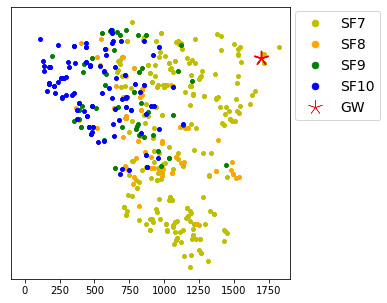

In [98]:
# ----- PLOT SIZE SETTINGS

# chart bounds
# o mapa da Unicamp Normalizado tem ~2508x2439 metros
xMin_bound, xMax_bound = -100, 2620
yMin_bound, yMax_bound = -100, 2600 

# chart figsize
x_figsize, y_figsize = 5, 5


# ----- LEGEND SETTINGS PER PLOT
def set_plots_legends():
   
    # legend list settings
    plots_legends = []
       
    # ED points
    colors = ['y','orange', 'green', 'blue']#, 'purple', 'black']
    for sf in range(len(colors)):
        scatter_lgd = mlines.Line2D([], [], color = 'white', marker = 'o',  markeredgecolor = colors[sf],
                                  markeredgewidth = 0.5, markerfacecolor = colors[sf], markersize = 7, 
                                  label = 'SF' + str(sf + 7))
        plots_legends.append(scatter_lgd)
    
    
    # GW points
    scatter_lgd = mlines.Line2D([], [], color = 'white', marker = (5,2), markeredgecolor = 'red',
                                  markeredgewidth = 0.5, markerfacecolor = 'red', markersize = 15, 
                                  label = 'GW')
    plots_legends.append(scatter_lgd)
    
    return plots_legends

# ----- EDs LISTS per SF

# to initialize multiple lists
eds_x_sf7, eds_y_sf7, eds_x_sf8, eds_y_sf8 = ([] for i in range(4))
eds_x_sf9, eds_y_sf9, eds_x_sf10, eds_y_sf10 = ([] for i in range(4))
# eds_x_sf11, eds_y_sf11, eds_x_sf12, eds_y_sf12 = ([] for i in range(4))


for i in range (len(net_position_df)):
    if net_position_df.iloc[i].sf == 7.0:
        eds_x_sf7.append(net_position_df.iloc[i].posX)
        eds_y_sf7.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 8.0:
        eds_x_sf8.append(net_position_df.iloc[i].posX)
        eds_y_sf8.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 9.0:
        eds_x_sf9.append(net_position_df.iloc[i].posX)
        eds_y_sf9.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 10.0:
        eds_x_sf10.append(net_position_df.iloc[i].posX)
        eds_y_sf10.append(net_position_df.iloc[i].posY)
#     if net_position_df.iloc[i].sf == 11.0:
#         eds_x_sf11.append(net_position_df.iloc[i].posX)
#         eds_y_sf11.append(net_position_df.iloc[i].posY)
#     if net_position_df.iloc[i].sf == 12.0:
#         eds_x_sf12.append(net_position_df.iloc[i].posX)
#         eds_y_sf12.append(net_position_df.iloc[i].posY)


# ----- PLOT ED E GW

# plot initialize
fig, ax = plt.subplots(figsize=(x_figsize, y_figsize))

# draw ED posxy per SF 
marker_size = 13
ax.scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7',s=marker_size)
ax.scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8',s=marker_size)
ax.scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9',s=marker_size)
ax.scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10',s=marker_size)
# ax.scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11')
# ax.scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF12')

# draw GW
ax.scatter(net_position_df.iloc[0].gw_posX, net_position_df.iloc[0].gw_posY, color='red', label ='GW', marker = (5,2), s = 200)
        
# legend settings
legends_list = set_plots_legends()
ax.legend(handles=[line for line in legends_list], loc="upper right", bbox_to_anchor=(1.35, 1.01), prop={'size': 14})

# chart bounds
ax.set(xlim=(xMin_bound, xMax_bound), ylim = (yMin_bound, yMax_bound))

# Title
# ax.set_title('Distribuição randômica de EDs em torno de GW.', fontweight='bold', fontsize=14, y=1.1)
ax.set_xlim(-100, 1900)
ax.set_ylim(150, 2600)
ax.get_yaxis().set_visible(False)
plt.show()
fig.savefig('cenarioIII_sf.png',bbox_inches='tight')

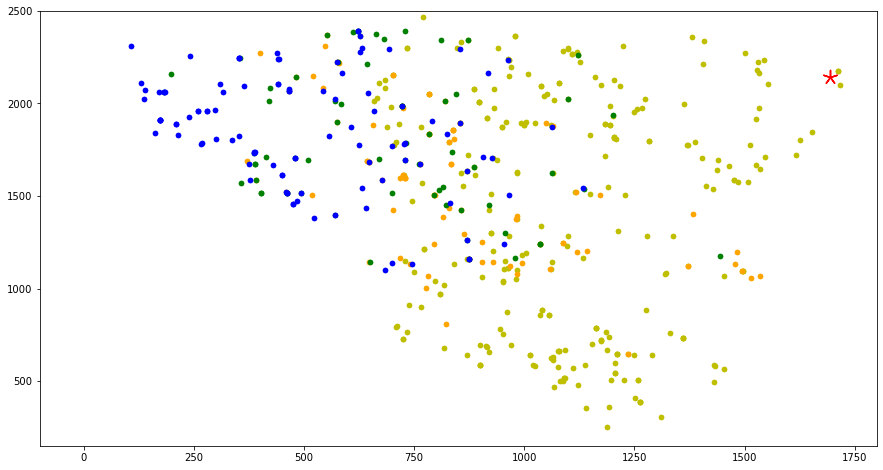

In [99]:
# ----- PLOT SIZE SETTINGS

# chart bounds
# o mapa da Unicamp Normalizado tem ~2508x2439 metros
xMin_bound, xMax_bound = -100, 2620
yMin_bound, yMax_bound = -100, 2600 

# chart figsize
# x_figsize, y_figsize = 5, 5
x_figsize, y_figsize = 15, 8


# ----- LEGEND SETTINGS PER PLOT
def set_plots_legends():
   
    # legend list settings
    plots_legends = []
       
    # ED points
    colors = ['y','orange', 'green', 'blue']#, 'purple', 'black']
    for sf in range(len(colors)):
        scatter_lgd = mlines.Line2D([], [], color = 'white', marker = 'o',  markeredgecolor = colors[sf],
                                  markeredgewidth = 0.5, markerfacecolor = colors[sf], markersize = 9, 
                                  label = 'SF' + str(sf + 7))
        plots_legends.append(scatter_lgd)
    
    
    # GW points
    scatter_lgd = mlines.Line2D([], [], color = 'white', marker = (5,2), markeredgecolor = 'red',
                                  markeredgewidth = 0.5, markerfacecolor = 'red', markersize = 15, 
                                  label = 'GW')
    plots_legends.append(scatter_lgd)
    
    return plots_legends

# ----- EDs LISTS per SF

# to initialize multiple lists
eds_x_sf7, eds_y_sf7, eds_x_sf8, eds_y_sf8 = ([] for i in range(4))
eds_x_sf9, eds_y_sf9, eds_x_sf10, eds_y_sf10 = ([] for i in range(4))
# eds_x_sf11, eds_y_sf11, eds_x_sf12, eds_y_sf12 = ([] for i in range(4))


for i in range (len(net_position_df)):
    if net_position_df.iloc[i].sf == 7.0:
        eds_x_sf7.append(net_position_df.iloc[i].posX)
        eds_y_sf7.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 8.0:
        eds_x_sf8.append(net_position_df.iloc[i].posX)
        eds_y_sf8.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 9.0:
        eds_x_sf9.append(net_position_df.iloc[i].posX)
        eds_y_sf9.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 10.0:
        eds_x_sf10.append(net_position_df.iloc[i].posX)
        eds_y_sf10.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 11.0:
        eds_x_sf11.append(net_position_df.iloc[i].posX)
        eds_y_sf11.append(net_position_df.iloc[i].posY)
#     if net_position_df.iloc[i].sf == 12.0:
#         eds_x_sf12.append(net_position_df.iloc[i].posX)
#         eds_y_sf12.append(net_position_df.iloc[i].posY)


# ----- PLOT ED E GW

# plot initialize
fig, ax = plt.subplots(sharey=True,figsize=(x_figsize, y_figsize))
# mapa_normalizado['geometry'].plot(ax=ax, color="tab:gray", linewidth = 2, markersize = 7)
# mapa_normalizado['geometry'].plot(ax=ax,color="silver", linewidth = 2, markersize = 7)

# draw ED posxy per SF 
ax.scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7', s=20)
ax.scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8', s=20)
ax.scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9', s=20)
ax.scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10', s=20)
# ax.scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11', s=15)
# ax.scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF12', s=15)

# draw GW
ax.scatter(net_position_df.iloc[0].gw_posX, net_position_df.iloc[0].gw_posY, color='red', label ='GW', marker = (5,2), s = 200)
        
# legend settings
legends_list = set_plots_legends()
# ax.legend(handles=[line for line in legends_list], loc="upper right", prop={'size': 14})

# chart bounds
# ax.set(xlim=(xMin_bound, xMax_bound), ylim = (yMin_bound, yMax_bound))

# Title
# ax.set_title('Distribuição randômica de EDs em torno de GW.', fontweight='bold', fontsize=14, y=1.025)

ax.set_xlim(-100, 1800)
ax.set_ylim(150, 2500)

# ax.get_yaxis().set_visible(False)

# ax = mapa_normalizado['geometry'].plot(figsize=(15, 8))

fig.savefig('dist_sf.png',bbox_inches='tight')
plt.show()


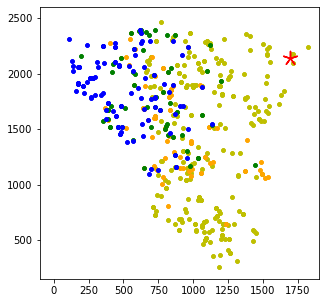

In [100]:
# ----- PLOT SIZE SETTINGS

# chart bounds
# o mapa da Unicamp Normalizado tem ~2508x2439 metros
xMin_bound, xMax_bound = -100, 2620
yMin_bound, yMax_bound = -100, 2600 

# chart figsize
x_figsize, y_figsize = 5, 5


# ----- LEGEND SETTINGS PER PLOT
def set_plots_legends():
   
    # legend list settings
    plots_legends = []
       
    # ED points
    colors = ['y','orange', 'green', 'blue']#, 'purple', 'black']
    for sf in range(len(colors)):
        scatter_lgd = mlines.Line2D([], [], color = 'white', marker = 'o',  markeredgecolor = colors[sf],
                                  markeredgewidth = 0.5, markerfacecolor = colors[sf], markersize = 7, 
                                  label = 'SF' + str(sf + 7))
        plots_legends.append(scatter_lgd)
    
    
    # GW points
    scatter_lgd = mlines.Line2D([], [], color = 'white', marker = (5,2), markeredgecolor = 'red',
                                  markeredgewidth = 0.5, markerfacecolor = 'red', markersize = 15, 
                                  label = 'GW')
    plots_legends.append(scatter_lgd)
    
    return plots_legends

# ----- EDs LISTS per SF

# to initialize multiple lists
eds_x_sf7, eds_y_sf7, eds_x_sf8, eds_y_sf8 = ([] for i in range(4))
eds_x_sf9, eds_y_sf9, eds_x_sf10, eds_y_sf10 = ([] for i in range(4))
# eds_x_sf11, eds_y_sf11, eds_x_sf12, eds_y_sf12 = ([] for i in range(4))


for i in range (len(net_position_df)):
    if net_position_df.iloc[i].sf == 7.0:
        eds_x_sf7.append(net_position_df.iloc[i].posX)
        eds_y_sf7.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 8.0:
        eds_x_sf8.append(net_position_df.iloc[i].posX)
        eds_y_sf8.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 9.0:
        eds_x_sf9.append(net_position_df.iloc[i].posX)
        eds_y_sf9.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 10.0:
        eds_x_sf10.append(net_position_df.iloc[i].posX)
        eds_y_sf10.append(net_position_df.iloc[i].posY)
#     if net_position_df.iloc[i].sf == 11.0:
#         eds_x_sf11.append(net_position_df.iloc[i].posX)
#         eds_y_sf11.append(net_position_df.iloc[i].posY)
#     if net_position_df.iloc[i].sf == 12.0:
#         eds_x_sf12.append(net_position_df.iloc[i].posX)
#         eds_y_sf12.append(net_position_df.iloc[i].posY)


# ----- PLOT ED E GW

# plot initialize
fig, ax = plt.subplots(figsize=(x_figsize, y_figsize))

# draw ED posxy per SF 
marker_size = 13
ax.scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7',s=marker_size)
ax.scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8',s=marker_size)
ax.scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9',s=marker_size)
ax.scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10',s=marker_size)
# ax.scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11')
# ax.scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF12')

# draw GW
ax.scatter(net_position_df.iloc[0].gw_posX, net_position_df.iloc[0].gw_posY, color='red', label ='GW', marker = (5,2), s = 200)
        
# legend settings
legends_list = set_plots_legends()
# ax.legend(handles=[line for line in legends_list], loc="upper right", bbox_to_anchor=(1.35, 1.01), prop={'size': 14})

# chart bounds
ax.set(xlim=(xMin_bound, xMax_bound), ylim = (yMin_bound, yMax_bound))

# Title
# ax.set_title('Distribuição randômica de EDs em torno de GW.', fontweight='bold', fontsize=14, y=1.1)
ax.set_xlim(-100, 1900)
ax.set_ylim(150, 2600)
plt.show()
fig.savefig('cenarioII_sf.png',bbox_inches='tight')

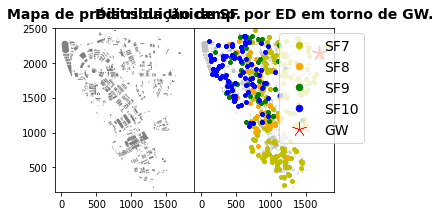

In [101]:
# ----- PLOT ED E GW

# plot initialize
fig, axes = plt.subplots(1, 2,sharey=True, figsize=(x_figsize, y_figsize))

mapa_normalizado['geometry'].plot(ax=axes[0], color="grey", linewidth = 2, markersize = 7)
axes[0].set_title('Mapa de prédios da Unicamp.', fontweight='bold', fontsize=14, y=1.025)

mapa_normalizado['geometry'].plot(ax=axes[1], color="silver", linewidth = 2, markersize = 7)
# draw ED posxy per SF 
marker_size = 13
axes[1].scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7', s=marker_size)
axes[1].scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8', s=marker_size)
axes[1].scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9', s=marker_size)
axes[1].scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10', s=marker_size)
# axes[1].scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11', s=marker_size)
# axes[1].scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF12', s=marker_size)

# draw GW
axes[1].scatter(net_position_df.iloc[0].gw_posX, net_position_df.iloc[0].gw_posY, color='red', label ='GW', marker = (5,2), s = 200)
        
# legend settings
legends_list = set_plots_legends()
axes[1].legend(handles=[line for line in legends_list], loc="upper right", bbox_to_anchor=(1.27, 1.01),prop={'size': 14})

# chart bounds
axes[1].set(xlim=(xMin_bound, xMax_bound), ylim = (yMin_bound, yMax_bound))

# Title
axes[1].set_title('Distribuição de SF por ED em torno de GW.', fontweight='bold', fontsize=14, y=1.025)

# axes[0].axis('equal')
axes[0].set_xlim(-100, 1900)
axes[0].set_ylim(150, 2500)
# axes[1].axis('equal')
axes[1].set_xlim(-100, 1900)
axes[1].set_ylim(150, 2500)

axes[1].get_yaxis().set_visible(False)

# set the spacing between subplots
# plt.axis('scaled')
plt.subplots_adjust(wspace=0.002)
# fig.tight_layout()
fig.savefig('mapas_dist_sf_per_node.png',bbox_inches='tight')
plt.show()


2620


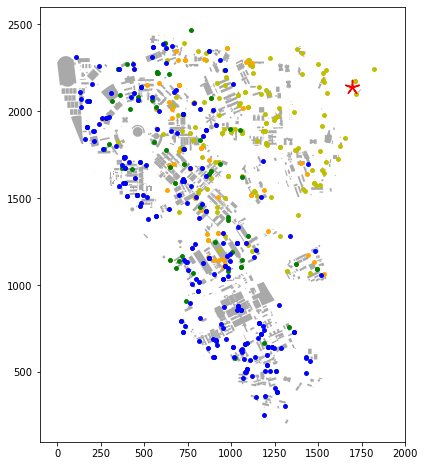

In [143]:
# ----- PLOT SIZE SETTINGS

# chart bounds
# o mapa da Unicamp Normalizado tem ~2508x2439 metros
xMin_bound, xMax_bound = -100, 2620
yMin_bound, yMax_bound = -100, 2600 

# chart figsize
# x_figsize, y_figsize = 5, 5
x_figsize, y_figsize = 15, 8


# ----- LEGEND SETTINGS PER PLOT
def set_plots_legends():
   
    # legend list settings
    plots_legends = []
       
    # ED points
    colors = ['y','orange', 'green', 'blue']#, 'purple', 'black']
    for sf in range(len(colors)):
        scatter_lgd = mlines.Line2D([], [], color = 'white', marker = 'o',  markeredgecolor = colors[sf],
                                  markeredgewidth = 0.5, markerfacecolor = colors[sf], markersize = 9, 
                                  label = 'SF' + str(sf + 7))
        plots_legends.append(scatter_lgd)
    
    
    # GW points
    scatter_lgd = mlines.Line2D([], [], color = 'white', marker = (5,2), markeredgecolor = 'red',
                                  markeredgewidth = 0.5, markerfacecolor = 'red', markersize = 15, 
                                  label = 'GW')
    plots_legends.append(scatter_lgd)
    
    return plots_legends

# ----- EDs LISTS per SF

# to initialize multiple lists
eds_x_sf7, eds_y_sf7, eds_x_sf8, eds_y_sf8 = ([] for i in range(4))
eds_x_sf9, eds_y_sf9, eds_x_sf10, eds_y_sf10 = ([] for i in range(4))
# eds_x_sf11, eds_y_sf11, eds_x_sf12, eds_y_sf12 = ([] for i in range(4))


for i in range (len(net_position_df)):
    if net_position_df.iloc[i].sf == 7.0:
        eds_x_sf7.append(net_position_df.iloc[i].posX)
        eds_y_sf7.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 8.0:
        eds_x_sf8.append(net_position_df.iloc[i].posX)
        eds_y_sf8.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 9.0:
        eds_x_sf9.append(net_position_df.iloc[i].posX)
        eds_y_sf9.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 10.0:
        eds_x_sf10.append(net_position_df.iloc[i].posX)
        eds_y_sf10.append(net_position_df.iloc[i].posY)
    if net_position_df.iloc[i].sf == 11.0:
        eds_x_sf11.append(net_position_df.iloc[i].posX)
        eds_y_sf11.append(net_position_df.iloc[i].posY)
#     if net_position_df.iloc[i].sf == 12.0:
#         eds_x_sf12.append(net_position_df.iloc[i].posX)
#         eds_y_sf12.append(net_position_df.iloc[i].posY)


# ----- PLOT ED E GW

# plot initialize
fig, ax = plt.subplots(figsize=(x_figsize, y_figsize))
# mapa_normalizado['geometry'].plot(ax=ax, color="tab:gray", linewidth = 2, markersize = 7)
mapa_normalizado['geometry'].plot(ax=ax, color="darkgray", linewidth = 2, markersize = 7)

# draw ED posxy per SF 
ax.scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7', s=15)
ax.scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8', s=15)
ax.scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9', s=15)
ax.scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10', s=15)
# ax.scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11', s=15)
# ax.scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF12', s=15)

# draw GW
ax.scatter(net_position_df.iloc[0].gw_posX, net_position_df.iloc[0].gw_posY, color='red', label ='GW', marker = (5,2), s = 200)
#ax.scatter(net_position_df.iloc[543].gw_posX, net_position_df.iloc[543].gw_posY, color='red', label ='GW', marker = (5,2), s = 200)
#ax.scatter(net_position_df.iloc[1086].gw_posX, net_position_df.iloc[1086].gw_posY, color='red', label ='GW', marker = (5,2), s = 200)

# legend settings
legends_list = set_plots_legends()
#ax.legend(handles=[line for line in legends_list], loc="upper right", bbox_to_anchor=(1, 1.),prop={'size': 14})
#ax.legend(handles=[line for line in legends_list], loc="upper right",prop={'size': 12})

# chart bounds
print(xMax_bound)
ax.set(xlim=(xMin_bound, 2000), ylim = (yMin_bound+200, yMax_bound))

#Title
#ax.set_title('Distribuição randômica de EDs em torno de GW.', fontweight='bold', fontsize=14, y=1.025)
fig.savefig('16_cenario_1gw.png',bbox_inches='tight')
#fig.savefig('mapa_predios_unicamp.png',bbox_inches='tight')

# ax = mapa_normalizado['geometry'].plot(figsize=(15, 8))

plt.show()

In [41]:
# Find GWs coords
# net_position_df[net_position_df.gwId == 543]
# net_position_df[net_position_df.gwId == 544]
net_position_df[net_position_df.gwId == 545]

,nodeId,posX,posY,posZ,sf,gwId,gw_posX,gw_posY,gw_posZ,distance
1086,0,1527.410,2180.210,1.5,7,545,155.709,2165.82,1.5,1371.77
1087,1,297.312,1965.810,1.5,7,545,155.709,2165.82,1.5,245.06
1088,2,1535.550,1646.180,1.5,7,545,155.709,2165.82,1.5,1474.45
1089,3,1149.490,1831.090,1.5,7,545,155.709,2165.82,1.5,1048.64
1090,4,1186.800,667.866,1.5,7,545,155.709,2165.82,1.5,1818.52
...,...,...,...,...,...,...,...,...,...,...
1624,538,1532.520,1976.720,1.5,7,545,155.709,2165.82,1.5,1389.73
1625,539,1626.840,1803.130,1.5,9,545,155.709,2165.82,1.5,1515.18
1626,540,1653.460,1845.820,1.5,7,545,155.709,2165.82,1.5,1531.55
1627,541,1715.960,2098.690,1.5,7,545,155.709,2165.82,1.5,1561.70


In [42]:
# ---------------------------- Artigo SIOT

# Criando Dataset - Coletores Não Recicláveis

## Mapeando as bases 

In [43]:
# ----- DATASET

path = "dataset_bases_conteiners_n_reciclaveis.txt"
conteiners_df = pd.read_csv(path) 

# print(path)
print("\nSHAPE:", conteiners_df.shape)
conteiners_df.head()


SHAPE: (76, 4)


,BASE,N_CONT,LATITUDE,LONGITUDE
0,1,4,-22.824351,-47.059808
1,2,1,-22.823597,-47.060283
2,3,2,-22.824440,-47.061506
3,4,1,-22.820314,-47.060398
4,5A,2,-22.819888,-47.059931


In [44]:
conteiners_df['LATITUDE'][0]

-22.824351

In [45]:
# ---- UNICAMP DYNAMIC PLOT MAP & MARKERS OF POSITIONS THAT PACKET WERE RECEIVE

# create folium map
fmap = folium.Map(width= 500,height=600,location=[-22.822617, -47.067], zoom_start=15, tiles='OpenStreetMap')

# add markers
for i in range(conteiners_df.shape[0]):
  lat, lng = conteiners_df['LATITUDE'][i], conteiners_df['LONGITUDE'][i]
  folium.Marker(
      location=[lat, lng],
      popup="Lat: " + str(lat) + ", Lng: " + str(lng),
#       popup="Lat: ",
      icon=folium.Icon(color="red", icon="info-sign"),
  ).add_to(fmap)

# fmap.add_child(folium.LatLngPopup())

fmap

In [46]:
# # salve map
fn="mapa_conteiners_n_reciclaveis.html"
fmap.save(fn)

In [47]:
# Rearranjar coordenadas para o tipo Point
pos_conteiners_df = gpd.GeoDataFrame(columns=["geometry"],  crs='EPSG:4326')
# for i in range(conteiners_df.shape[0]):
#   pos_conteiners_df.loc[i, 'geometry'] = Point(conteiners_df['LONGITUDE'][i], conteiners_df['LATITUDE'][i])

# pos botoom GW
# pos_conteiners_df.loc[1, 'geometry'] = Point(-47.0628, -22.8312)

# pos FEF GW
pos_conteiners_df.loc[1, 'geometry'] = Point(-47.0727, -22.8145)

#pos_conteiners_df.head()

# Convertendo Coordenadas em Degree para metros (31983)
pos_conteiners_df = pos_conteiners_df.to_crs('EPSG:31983')
# pontos_onibus_df.crs
pos_conteiners_df
pos_conteiners_df.head()

,geometry
1,POINT (287264.721 7475522.331)


In [48]:
# for coords in pos_conteiners_df['geometry']:
#     print(coords, coords.x, coords.y )

In [49]:
# NORMALIZAÇÃO DE PONTOS 
norm_points = []

# convert to 2D array 
x = np.array(all_coords_x).reshape(-1, 1) # reshape -> 2D array
y = np.array(all_coords_y).reshape(-1, 1)

for coords in pos_conteiners_df['geometry']:
    # convert to 2D array
    x_coords = np.array([coords.x]).reshape(-1, 1)
    y_coords = np.array([coords.y]).reshape(-1, 1)

    # define limits of normalization
    scaler_x = MinMaxScaler(feature_range = (0, unicamp_maxx - unicamp_minx))
    scaler_y = MinMaxScaler(feature_range = (0, unicamp_maxy - unicamp_miny))

    # normalize with all all geometry coords x 
    scaler_x.fit(x)
    transform_x = scaler_x.transform(x_coords)

    # normalize with all all geometry coords y
    scaler_y.fit(y)
    transform_y = scaler_y.transform(y_coords)

#     print(transform_x, transform_y)
    norm_points.append(Point(transform_x, transform_y))

print(norm_points[0])
print(len(norm_points))

POINT (155.7086227349937 2165.8198882229626)
1


In [50]:
# Criando pos_conteiners_df normalizado
pos_conteiners_norm_df = gpd.GeoDataFrame(columns=["geometry"],  crs='EPSG:31983')
for i in range(len(norm_points)):
    pos_conteiners_norm_df.loc[i, 'geometry'] = norm_points[i]

pos_conteiners_norm_df.head()

,geometry
0,POINT (155.709 2165.820)


<AxesSubplot:>

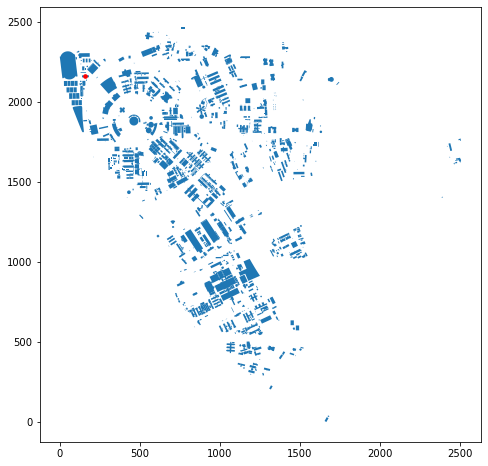

In [51]:
# Plot de paradas de ÔNIBUS
ax = mapa_normalizado['geometry'].plot(figsize=(15, 8))
pos_conteiners_norm_df.plot(ax=ax, color="red", linewidth=2, markersize =7)

In [52]:
# GENERATE BUILDINGS CSV FILE

#---- create a csv file
def create_csv(title, colunms_names):
    with open(title,"w+") as file:
        writer = csv.writer(file, delimiter=",")
        writer.writerow(colunms_names)


#---- add row on csv file
def add_csv_rows(ns3_settings, colunms_names, title):
    for colunm in ns3_settings:
        if len(colunm) == len(colunms_names):
            with open(title,"a") as file:
                writer = csv.writer(file, delimiter=",")
                writer.writerow([x for x in colunm])


In [53]:
colunms_names  = ['x', 'y', 'z']

nodes_pos = []
for i in range(len(pos_conteiners_norm_df.geometry)):
    # tratando a string Point
    point_str = str(pos_conteiners_norm_df['geometry'][i])
    point_coords = point_str[point_str.find("(") + 1:]
    point_coords = point_coords[ : point_coords.find(")")]
#     print(i, " - ",point_coords)
    x = point_coords.split()[0]
    y = point_coords.split()[1]
    z = 1.5

    items_per_row = [x, y, z]
    nodes_pos.append(items_per_row)

output_filename = 'base_conteiners_dataset.csv'
create_csv(output_filename, colunms_names)
add_csv_rows(nodes_pos, colunms_names, output_filename)

In [54]:
# Visualizando dataset criado
node_pos_df = pd.read_csv(output_filename) 
print("DATASET SHAPE:", node_pos_df.shape)
node_pos_df.head()

DATASET SHAPE: (1, 3)


,x,y,z
0,155.708623,2165.819888,1.5


## Mapeando os contêiners 

Cada base pode ter de 1 a 5 conteiners. Olhar ***Mapa de localização dos conteiners de lixo.pdf***

In [55]:
a = pos_conteiners_norm_df['geometry'][0]
print(a.x)

155.7086227349937


In [56]:
conteiner_positions_list = []
def set_base_conteiners(num_conteiners, base_position):    
    distance_between_bases = 0.5 # meters
    aux = 0
    
    df = gpd.GeoDataFrame(columns=["geometry"],  crs='EPSG:31983')
    for i in range(num_conteiners):
        df.loc[i, 'geometry'] = Point(base_position.x + aux, base_position.y + aux)
        conteiner_positions_list.append(Point(base_position.x + aux, base_position.y + aux))
        aux = aux + distance_between_bases
    
    return df

(2145.8198882229626, 2185.8198882229626)

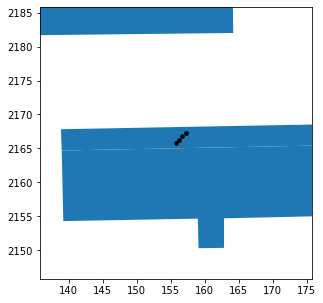

In [57]:
current_position = 0.0
for i in range(len(pos_conteiners_norm_df.geometry)):
    df = set_base_conteiners(conteiners_df['N_CONT'][i], pos_conteiners_norm_df['geometry'][i])   
    current_position = pos_conteiners_norm_df['geometry'][i]

ax = mapa_normalizado['geometry'].plot(figsize=(12, 5))
df.plot(ax=ax, color="black", linewidth=2, markersize =7)
ax.set_xlim(current_position.x - 20, current_position.x + 20)
ax.set_ylim(current_position.y - 20, current_position.y + 20)

In [58]:
len(conteiner_positions_list)

4

In [59]:
all_conteiners_df = gpd.GeoDataFrame(columns=["geometry"],  crs='EPSG:31983')
for i in range(len(conteiner_positions_list)):
    all_conteiners_df.loc[i, 'geometry'] = conteiner_positions_list[i]

print("SHAPE:", all_conteiners_df.shape[0])
all_conteiners_df.head()

SHAPE: 4


,geometry
0,POINT (155.709 2165.820)
1,POINT (156.209 2166.320)
2,POINT (156.709 2166.820)
3,POINT (157.209 2167.320)


(1180.0, 1230.0)

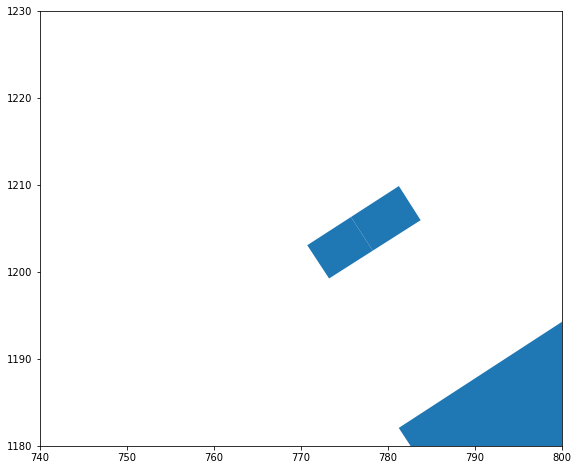

In [60]:
# Plot de paradas de ÔNIBUS
ax = mapa_normalizado['geometry'].plot(figsize=(15, 8))
all_conteiners_df.plot(ax=ax, color="red", linewidth=2, markersize =7)
# para ampliar area mudar param. de set_xlim e set_ylim
minx, miny, maxx, maxy = mapa_normalizado.total_bounds
ax.set_xlim(740, 800)
ax.set_ylim(1180, 1230)


In [61]:
colunms_names  = ['x', 'y', 'z']

nodes_pos = []
for i in range(len(all_conteiners_df.geometry)):
    # tratando a string Point
    point_str = str(all_conteiners_df['geometry'][i])
    point_coords = point_str[point_str.find("(") + 1:]
    point_coords = point_coords[ : point_coords.find(")")]
#     print(i, " - ",point_coords)
    x = point_coords.split()[0]
    y = point_coords.split()[1]
    z = 1.5

    items_per_row = [x, y, z]
    nodes_pos.append(items_per_row)

output_filename = 'conteiners_dataset.csv'
create_csv(output_filename, colunms_names)
add_csv_rows(nodes_pos, colunms_names, output_filename)

In [62]:
# Visualizando dataset criado
output_filename = 'conteiners_dataset.csv'
conteiners_df = pd.read_csv(output_filename) 
print("DATASET SHAPE:", conteiners_df.shape)
conteiners_df.head()

DATASET SHAPE: (4, 3)


,x,y,z
0,155.708623,2165.819888,1.5
1,156.208623,2166.319888,1.5
2,156.708623,2166.819888,1.5
3,157.208623,2167.319888,1.5


In [63]:
# ----- DATASET

path = "dataset_bases_conteiners_n_reciclaveis.txt"
conteiners_bases_df = pd.read_csv(path) 

# print(path)
print("\nSHAPE:", conteiners_bases_df.shape)
conteiners_bases_df.head()


SHAPE: (76, 4)


,BASE,N_CONT,LATITUDE,LONGITUDE
0,1,4,-22.824351,-47.059808
1,2,1,-22.823597,-47.060283
2,3,2,-22.824440,-47.061506
3,4,1,-22.820314,-47.060398
4,5A,2,-22.819888,-47.059931


In [64]:
conteiners_bases_df['N_CONT'][0]

4

In [65]:
lat = []
lng = []
for i in range(conteiners_bases_df.shape[0]):
    for j in range(conteiners_bases_df['N_CONT'][i]):
        lat.append(conteiners_bases_df['LATITUDE'][i])
        lng.append(conteiners_bases_df['LONGITUDE'][i])


In [66]:
# create new df 
df_coords = pd.DataFrame({'lat':lat, 'lng':lng })
df_coords.head()

,lat,lng
0,-22.824351,-47.059808
1,-22.824351,-47.059808
2,-22.824351,-47.059808
3,-22.824351,-47.059808
4,-22.823597,-47.060283


In [67]:
conteiners_df['lat'] = df_coords['lat']
conteiners_df['lng'] = df_coords['lng']
conteiners_df.head()

,x,y,z,lat,lng
0,155.708623,2165.819888,1.5,-22.824351,-47.059808
1,156.208623,2166.319888,1.5,-22.824351,-47.059808
2,156.708623,2166.819888,1.5,-22.824351,-47.059808
3,157.208623,2167.319888,1.5,-22.824351,-47.059808


## Add Elevação

In [68]:
# ADD Elevação
import time
import requests

def get_point_elevation(lat, lng):
    receive = requests.get('https://api.opentopodata.org/v1/aster30m?locations=' + str(lat) + ','+ str(lng))
    data = receive.json()
#     print(data['results'][0]['elevation'])
    return float(data['results'][0]['elevation'])

In [69]:
elevation_column = []
for i in range(conteiners_df.shape[0]):
    elevation = get_point_elevation(conteiners_df['lat'][i], conteiners_df['lng'][i])
    elevation_column.append(elevation)
    #print("i:", i, "elevation", elevation)
    time.sleep(1)

print(len(elevation_column))
print(elevation_column)

4
[628.0, 628.0, 628.0, 628.0]


In [70]:
# create new df 
df_elev = pd.DataFrame({'elev':elevation_column})
df_elev.head()

conteiners_df['elevation'] = df_elev['elev']
conteiners_df.head()

,x,y,z,lat,lng,elevation
0,155.708623,2165.819888,1.5,-22.824351,-47.059808,628.0
1,156.208623,2166.319888,1.5,-22.824351,-47.059808,628.0
2,156.708623,2166.819888,1.5,-22.824351,-47.059808,628.0
3,157.208623,2167.319888,1.5,-22.824351,-47.059808,628.0


In [71]:
# saving the dataframe
conteiners_df.to_csv('conteiners_dataset_elev.csv')

# Criando Dataset - Medidores inteligentes¶

In [72]:
# # ----- DATASET
# from pandas import read_excel

# path = "Medidores_atualizados.xlsx"
# medidores_df = pd.read_excel(path) 

# # print(path)
# print("\nSHAPE:", medidores_df.shape)
# medidores_df.head()

In [73]:
# del medidores_df["Responsável"]
# medidores_df.head()

In [74]:
# convertendo xlsx to csv
# medidores_df.to_csv('medidores_inteligentes_dataset.csv')

In [75]:
path = "Medidores_atualizados.csv"
medidores_df = pd.read_csv(path, index_col=0) 

# print(path)
print("\nSHAPE:", medidores_df.shape)
medidores_df.head()


SHAPE: (321, 6)


,OBJECTID,Name,FolderPath,PopupInfo,x,y
0,1,T00_01_01A INOVA SOFT,Pontos de Acesso - Expansões 2 e 3/Medidores A...,Nº: 1<br>Quadra: 0<br>Endereço: AV. ALAN TURIN...,-47.060745,-22.812911
1,2,T01_01_01A REITORIA IV / V,Pontos de Acesso - Expansões 2 e 3/Medidores A...,Nº: 2<br>Quadra: 1<br>Endereço: R. DA REITORIA...,-47.067359,-22.823599
2,3,T01_02_01A REITORIA IV DGRH,Pontos de Acesso - Expansões 2 e 3/Medidores A...,Nº: 3<br>Quadra: 1<br>Endereço: R. DA REITORIA...,-47.067246,-22.823779
3,4,T01_03_01A REITORIA Il,Pontos de Acesso - Expansões 2 e 3/Medidores A...,Nº: 4<br>Quadra: 1<br>Endereço: R. DA REITORIA...,-47.067137,-22.823914
4,5,T01_04_01A REITORIA I PG/SG,Pontos de Acesso - Expansões 2 e 3/Medidores A...,Nº: 5<br>Quadra: 1<br>Endereço: R. DA REITORIA...,-47.066751,-22.824473


In [76]:
medidores_df.rename(columns = {'x':'LONGITUDE', 'y':'LATITUDE'}, inplace = True)

In [77]:
medidores_df.head()

,OBJECTID,Name,FolderPath,PopupInfo,LONGITUDE,LATITUDE
0,1,T00_01_01A INOVA SOFT,Pontos de Acesso - Expansões 2 e 3/Medidores A...,Nº: 1<br>Quadra: 0<br>Endereço: AV. ALAN TURIN...,-47.060745,-22.812911
1,2,T01_01_01A REITORIA IV / V,Pontos de Acesso - Expansões 2 e 3/Medidores A...,Nº: 2<br>Quadra: 1<br>Endereço: R. DA REITORIA...,-47.067359,-22.823599
2,3,T01_02_01A REITORIA IV DGRH,Pontos de Acesso - Expansões 2 e 3/Medidores A...,Nº: 3<br>Quadra: 1<br>Endereço: R. DA REITORIA...,-47.067246,-22.823779
3,4,T01_03_01A REITORIA Il,Pontos de Acesso - Expansões 2 e 3/Medidores A...,Nº: 4<br>Quadra: 1<br>Endereço: R. DA REITORIA...,-47.067137,-22.823914
4,5,T01_04_01A REITORIA I PG/SG,Pontos de Acesso - Expansões 2 e 3/Medidores A...,Nº: 5<br>Quadra: 1<br>Endereço: R. DA REITORIA...,-47.066751,-22.824473


In [78]:
# ---- UNICAMP DYNAMIC PLOT MAP & MARKERS OF POSITIONS THAT PACKET WERE RECEIVE

# create folium map
fmap = folium.Map(width= 600,height=550,location=[-22.821606, -47.067], zoom_start=15, tiles='OpenStreetMap')

# add markers
for i in range(medidores_df.shape[0]):
  lat, lng = medidores_df['LATITUDE'][i], medidores_df['LONGITUDE'][i]
  folium.Marker(
      location=[lat, lng],
      popup="Lat: " + str(lat) + ", Lng: " + str(lng),
#       popup="Lat: ",
      icon=folium.Icon(color="purple", icon="info-sign"),
  ).add_to(fmap)

# fmap.add_child(folium.LatLngPopup())

fmap

In [79]:
# # salve map
fn="mapa_medidores_inteligentes.html"
fmap.save(fn)

## Normalizando dataset

In [80]:
# Rearranjar coordenadas para o tipo Point
pos_medidores_df = gpd.GeoDataFrame(columns=["geometry"],  crs='EPSG:4326')
for i in range(medidores_df.shape[0]):
  pos_medidores_df.loc[i, 'geometry'] = Point(medidores_df['LONGITUDE'][i], medidores_df['LATITUDE'][i])

#pos_conteiners_df.head()

# Convertendo Coordenadas em Degree para metros (31983)
pos_medidores_df = pos_medidores_df.to_crs('EPSG:31983')
# pontos_onibus_df.crs
pos_medidores_df
pos_medidores_df.head()

,geometry
0,POINT (288489.663 7475715.483)
1,POINT (287827.179 7474522.321)
2,POINT (287839.059 7474502.548)
3,POINT (287850.459 7474487.754)
4,POINT (287890.952 7474426.401)


In [81]:
# for coords in pos_conteiners_df['geometry']:
#     print(coords, coords.x, coords.y )

In [82]:
# NORMALIZAÇÃO DE PONTOS 
norm_points = []

# convert to 2D array 
x = np.array(all_coords_x).reshape(-1, 1) # reshape -> 2D array
y = np.array(all_coords_y).reshape(-1, 1)

for coords in pos_medidores_df['geometry']:
    # convert to 2D array
    x_coords = np.array([coords.x]).reshape(-1, 1)
    y_coords = np.array([coords.y]).reshape(-1, 1)

    # define limits of normalization
    scaler_x = MinMaxScaler(feature_range = (0, unicamp_maxx - unicamp_minx))
    scaler_y = MinMaxScaler(feature_range = (0, unicamp_maxy - unicamp_miny))

    # normalize with all all geometry coords x 
    scaler_x.fit(x)
    transform_x = scaler_x.transform(x_coords)

    # normalize with all all geometry coords y
    scaler_y.fit(y)
    transform_y = scaler_y.transform(y_coords)

#     print(transform_x, transform_y)
    norm_points.append(Point(transform_x, transform_y))

print(norm_points[0])
print(len(norm_points))

POINT (1380.6499648057506 2358.9723212607205)
321


In [83]:
# Criando pos_conteiners_df normalizado
pos_medidores_norm_df = gpd.GeoDataFrame(columns=["geometry"],  crs='EPSG:31983')
for i in range(len(norm_points)):
    pos_medidores_norm_df.loc[i, 'geometry'] = norm_points[i]

pos_medidores_norm_df.head()

,geometry
0,POINT (1380.650 2358.972)
1,POINT (718.167 1165.810)
2,POINT (730.047 1146.037)
3,POINT (741.446 1131.243)
4,POINT (781.940 1069.890)


<AxesSubplot:>

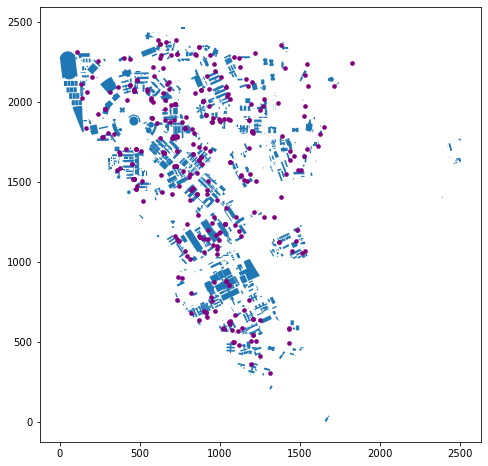

In [84]:
# Plot de paradas de ÔNIBUS
ax = mapa_normalizado['geometry'].plot(figsize=(15, 8))
pos_medidores_norm_df.plot(ax=ax, color="purple", linewidth=2, markersize =7)

In [85]:
# GENERATE BUILDINGS CSV FILE

#---- create a csv file
def create_csv(title, colunms_names):
    with open(title,"w+") as file:
        writer = csv.writer(file, delimiter=",")
        writer.writerow(colunms_names)


#---- add row on csv file
def add_csv_rows(ns3_settings, colunms_names, title):
    for colunm in ns3_settings:
        if len(colunm) == len(colunms_names):
            with open(title,"a") as file:
                writer = csv.writer(file, delimiter=",")
                writer.writerow([x for x in colunm])


In [86]:
colunms_names  = ['x', 'y', 'z']

nodes_pos = []
for i in range(len(pos_medidores_norm_df.geometry)):
    # tratando a string Point
    point_str = str(pos_medidores_norm_df['geometry'][i])
    point_coords = point_str[point_str.find("(") + 1:]
    point_coords = point_coords[ : point_coords.find(")")]
#     print(i, " - ",point_coords)
    x = point_coords.split()[0]
    y = point_coords.split()[1]
    z = 1.5

    items_per_row = [x, y, z]
    nodes_pos.append(items_per_row)

output_filename = 'medidores_inteligentes_dataset.csv'
create_csv(output_filename, colunms_names)
add_csv_rows(nodes_pos, colunms_names, output_filename)

In [87]:
# Visualizando dataset criado
output_filename = 'medidores_inteligentes_dataset.csv'
node_pos_df = pd.read_csv(output_filename) 
print("DATASET SHAPE:", node_pos_df.shape)
node_pos_df.head()

DATASET SHAPE: (321, 3)


,x,y,z
0,1380.649965,2358.972321,1.5
1,718.166862,1165.809614,1.5
2,730.046698,1146.037408,1.5
3,741.446086,1131.243106,1.5
4,781.939848,1069.889758,1.5


## Add Elevaçao

In [88]:
# ADD Elevação
import time
import requests

def get_point_elevation(lat, lng):
    receive = requests.get('https://api.opentopodata.org/v1/aster30m?locations=' + str(lat) + ','+ str(lng))
    data = receive.json()
#     print(data['results'][0]['elevation'])
    return float(data['results'][0]['elevation'])

In [89]:
node_pos_df['lat'] = medidores_df['LATITUDE']
node_pos_df['lng'] = medidores_df['LONGITUDE']

In [90]:
node_pos_df.head()

,x,y,z,lat,lng
0,1380.649965,2358.972321,1.5,-22.812911,-47.060745
1,718.166862,1165.809614,1.5,-22.823599,-47.067359
2,730.046698,1146.037408,1.5,-22.823779,-47.067246
3,741.446086,1131.243106,1.5,-22.823914,-47.067137
4,781.939848,1069.889758,1.5,-22.824473,-47.066751


In [91]:
elevation_column = []
for i in range(node_pos_df.shape[0]):
    elevation = get_point_elevation(node_pos_df['lat'][i], node_pos_df['lng'][i])
    elevation_column.append(elevation)
    print("i:", i)
    print("elevation", elevation)
    time.sleep(1)

len(elevation_column)

i: 0
elevation 619.0
i: 1
elevation 605.0
i: 2
elevation 605.0
i: 3
elevation 605.0
i: 4
elevation 606.0
i: 5
elevation 608.0
i: 6
elevation 613.0
i: 7
elevation 604.0
i: 8
elevation 612.0
i: 9
elevation 599.0
i: 10
elevation 599.0
i: 11
elevation 599.0
i: 12
elevation 599.0
i: 13
elevation 620.0
i: 14
elevation 620.0
i: 15
elevation 619.0
i: 16
elevation 619.0
i: 17
elevation 621.0
i: 18
elevation 614.0
i: 19
elevation 623.0
i: 20
elevation 618.0
i: 21
elevation 625.0
i: 22
elevation 625.0
i: 23
elevation 626.0
i: 24
elevation 625.0
i: 25
elevation 627.0
i: 26
elevation 629.0
i: 27
elevation 621.0
i: 28
elevation 621.0
i: 29
elevation 627.0
i: 30
elevation 625.0
i: 31
elevation 611.0
i: 32
elevation 605.0
i: 33
elevation 604.0
i: 34
elevation 607.0
i: 35
elevation 611.0
i: 36
elevation 604.0
i: 37
elevation 604.0
i: 38
elevation 604.0
i: 39
elevation 604.0
i: 40
elevation 604.0
i: 41
elevation 604.0
i: 42
elevation 611.0
i: 43
elevation 603.0
i: 44
elevation 611.0
i: 45
elevation 609.

321

In [92]:
#for i in elevation_column:
#    print(i)

In [93]:
# create new df 
df_elev = pd.DataFrame({'elev':elevation_column})
df_elev.head()

node_pos_df['elevation'] = df_elev['elev']

In [94]:
node_pos_df.head()

,x,y,z,lat,lng,elevation
0,1380.649965,2358.972321,1.5,-22.812911,-47.060745,619.0
1,718.166862,1165.809614,1.5,-22.823599,-47.067359,605.0
2,730.046698,1146.037408,1.5,-22.823779,-47.067246,605.0
3,741.446086,1131.243106,1.5,-22.823914,-47.067137,605.0
4,781.939848,1069.889758,1.5,-22.824473,-47.066751,606.0


In [95]:
# saving the dataframe
node_pos_df.to_csv('medidores_inteligentes_dataset_elev.csv')